# Exergy Destruction and Second Law Efficiency in Data Center Cooling (LLM-Generated Solution)

### Problem Summary
This notebook investigates the thermodynamic performance of a water-cooled data center server using second-law efficiency. Specifically, we explore how chip temperature affects exergy destruction and calculate the second-law efficiency.

Assumptions
- One CPU server operating at a constant power of 200 W (all electrical exergy)
- Water used for single-phase cooling (liquid throughout)
- Coolant enters at 20°C and exits at the chip temperature
- Chip temperature varies from 40°C to 100°C
- Constant water flow rate: 0.01 kg/s
- Pump operates isentropically with no losses (ideal)
- Exergy recovery: potential to use heated water downstream (e.g., heating)
- Ambient (dead state): 25°C (298.15 K)
- Pressure: 1 atm

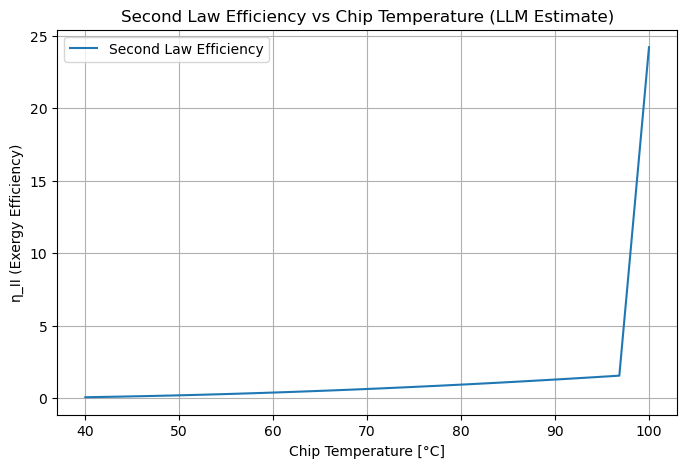

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

# Constants
fluid = 'Water'
P = 1e5                 # Pa
T_ambient = 298.15      # K (25°C)
m_dot = 0.01            # kg/s
W_chip = 200.0          # Electrical power input to chip [W]

# Define chip temperature range
T_chip_range = np.linspace(313.15, 373.15, 20)  # 40°C to 100°C

# Arrays to store results
eta_II_list = []
ex_in_list = []
ex_out_list = []

for T_chip in T_chip_range:
    # Inlet state
    h_in = CP.PropsSI('H', 'T', 293.15, 'P', P, fluid)
    s_in = CP.PropsSI('S', 'T', 293.15, 'P', P, fluid)

    # Outlet state (chip temperature)
    h_out = CP.PropsSI('H', 'T', T_chip, 'P', P, fluid)
    s_out = CP.PropsSI('S', 'T', T_chip, 'P', P, fluid)

    # Heat transferred into water (assumed recovered)
    Q_dot = m_dot * (h_out - h_in)

    # Exergy recovered from heated water
    ex_out = m_dot * ((h_out - h_in) - T_ambient * (s_out - s_in))

    # Pump work (assumed ideal, constant pressure drop)
    rho = CP.PropsSI('D', 'T', 293.15, 'P', P, fluid)
    v = 1 / rho
    delta_P = 5e4  # Assume a 0.5 bar pressure rise
    W_pump = m_dot * v * delta_P  # Ideal work

    # Total exergy input: chip + pump
    ex_in = W_chip + W_pump

    # Second law efficiency
    eta_II = ex_out / ex_in

    # Store results
    eta_II_list.append(eta_II)
    ex_out_list.append(ex_out)
    ex_in_list.append(ex_in)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(np.array(T_chip_range) - 273.15, eta_II_list, label='Second Law Efficiency')
plt.xlabel('Chip Temperature [°C]')
plt.ylabel('η_II (Exergy Efficiency)')
plt.title('Second Law Efficiency vs Chip Temperature (LLM Estimate)')
plt.grid(True)
plt.legend()
plt.show()
